# Borders and Corners detection

## Gradient

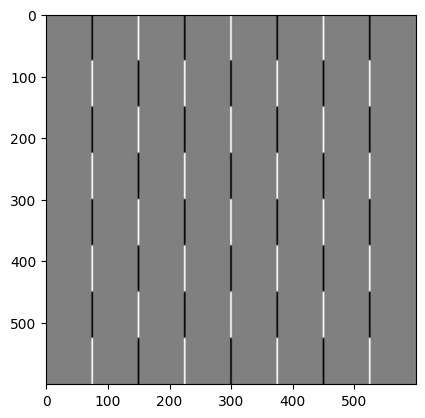

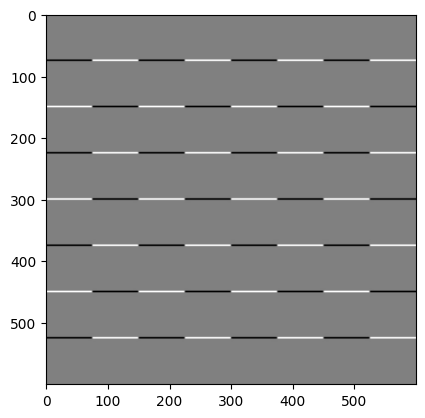

In [9]:
import cv2
import matplotlib.pyplot as plt

img_path = "img/board.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

# VERTICAL LINES.
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap='gray')

plt.figure()

# HORIZONTAL LINES.
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap='gray')

laplacian = cv2.Laplacian(img, cv2.CV_64F)


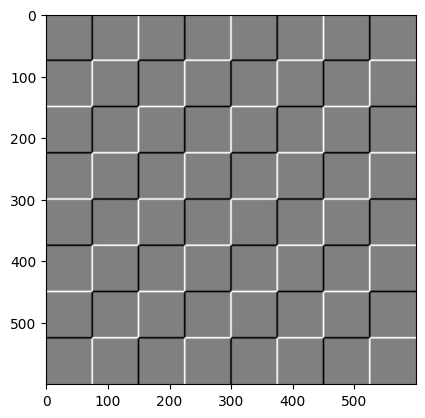

In [13]:
blend_img = cv2.addWeighted(src1=sobelx, src2=sobely, alpha=1, beta=1, gamma=0)
plt.imshow(blend_img, cmap='gray')

## Laplacian

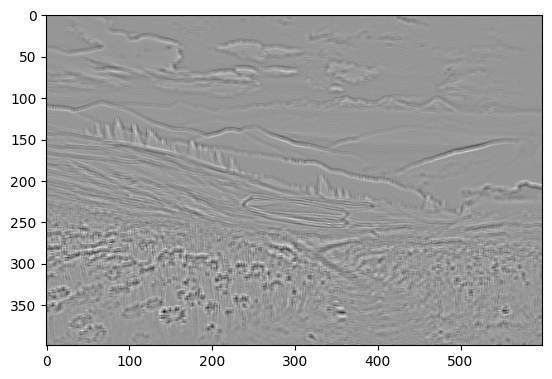

In [17]:
import cv2
import matplotlib.pyplot as plt

img_path = "img/nature.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5,5), 10)

plt.imshow(img, cmap='gray')

laplacian = cv2.Laplacian(img, cv2.CV_64F) 
plt.imshow(laplacian, cmap='gray')
